In [64]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, cosine
from sklearn.metrics.pairwise import (
    paired_euclidean_distances, 
    paired_manhattan_distances, 
    manhattan_distances, 
    cosine_distances, 
    cosine_similarity
)
from sklearn.cluster import DBSCAN
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import OneHotEncoder

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

In [15]:
## HELPER FUNCTIONS

# This function will allow us to find the average distance between two sets of data
def avg_distance(X1, X2, distance_func):
    from sklearn.metrics import jaccard_score
    #print(distance_func)
    res = 0
    for x1 in X1:
        for x2 in X2:
            if distance_func == jaccard_score: # the jaccard_score function only returns jaccard_similarity
                res += 1 - distance_func(x1, x2)
            else:
                res += distance_func(x1, x2)
    return res / (len(X1) * len(X2))

# This function will allow us to find the average pairwise distance
def avg_pairwise_distance(X1, X2, distance_func):
    return sum(map(distance_func, X1, X2)) / min(len(X1), len(X2))

In [16]:
df = pd.read_csv("./data/iris.csv")
df.drop(['petal_width'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   species       150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


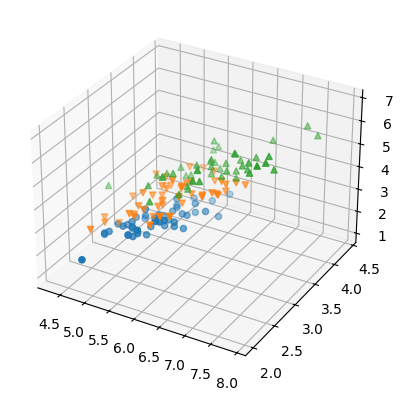

In [17]:
species = df['species'].unique()
attrs = ['sepal_length', 'sepal_width', 'petal_length']
markers = ['o', 'v', '^']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for specie, marker in zip(species, markers):
    specie_data = df.loc[df['species'] == specie][attrs]
    xs, ys, zs = [specie_data[attr] for attr in attrs]
    ax.scatter(xs, ys, zs, marker=marker)
plt.show()

In [18]:
setosa_data = df.loc[df['species'] == 'setosa'][attrs].to_numpy()
versicolor_data = df.loc[df['species'] == 'versicolor'][attrs].to_numpy()
virginica_data = df.loc[df['species'] == 'virginica'][attrs].to_numpy()

## Euclidean Distance

In [22]:
(
    avg_distance(setosa_data, setosa_data, euclidean),
    avg_distance(setosa_data, versicolor_data, euclidean),
    avg_distance(setosa_data, virginica_data, euclidean)
)

(0.6637635523285276, 3.1110307382429827, 4.470017704302476)

In [21]:
X = np.array([[0, 0]], dtype=float)
Y = np.array([[3, 4]], dtype=float)
paired_euclidean_distances(X, Y).mean(), avg_pairwise_distance(X, Y, euclidean)

(np.float64(5.0), 5.0)

## Manhattan Distance

In [24]:
(
    avg_distance(setosa_data, setosa_data, cityblock),
    avg_distance(setosa_data, versicolor_data, cityblock),
    avg_distance(setosa_data, virginica_data, cityblock)
)

(np.float64(0.9921600000000026),
 np.float64(4.439119999999999),
 np.float64(6.219039999999988))

In [25]:
X = np.array([[1, 1]])
Y = np.array([[-2, 2]])
manhattan_distances(X, Y)

array([[4.]])

## Cosine Distance

In [30]:
df = pd.read_csv(
    "./data/auto-mpg.data", 
    header=None, 
    delim_whitespace=True,
    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

# Clean Data and select columns
df['car_name'] = df['car_name'].str.split(n=1).apply(lambda lst: lst[0]).replace('chevrolet', 'chevy')
df.rename(columns={'car_name': 'make'}, inplace=True)
df = df[['mpg', 'weight', 'make']]

# Normalize data
dfn = df[['mpg', 'weight']]
df[['mpg', 'weight']] = (dfn-dfn.min())/(dfn.max()-dfn.min())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   weight  398 non-null    float64
 2   make    398 non-null    object 
dtypes: float64(2), object(1)
memory usage: 9.5+ KB


C:\Users\Florian-Music\AppData\Local\Temp\ipykernel_11796\3129229059.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


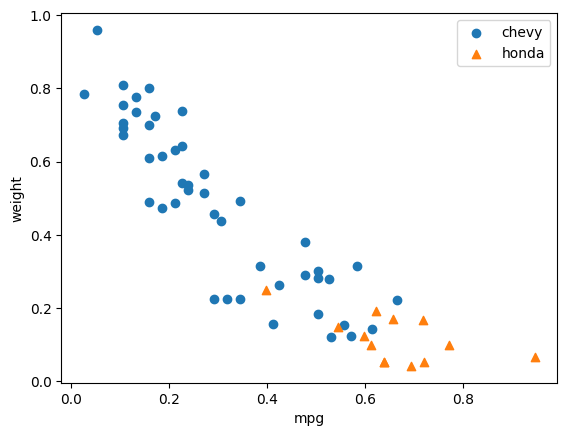

In [31]:
chevy = df.loc[df['make'] == 'chevy']
honda = df.loc[df['make'] == 'honda']

plt.scatter(chevy['mpg'], chevy['weight'], marker='o', label='chevy')
plt.scatter(honda['mpg'], honda['weight'], marker='^', label='honda')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

In [32]:
chevy_data = chevy[['mpg', 'weight']].to_numpy()
honda_data = honda[['mpg', 'weight']].to_numpy()

In [34]:
(
    avg_distance(chevy_data, chevy_data, cosine),
    avg_distance(honda_data, honda_data, cosine),
    avg_distance(honda_data, chevy_data, cosine)
)

(np.float64(0.1686029684688174),
 np.float64(0.017557196207440316),
 np.float64(0.3511900540950527))

In [36]:
X = np.array([[1, 1]])
Y = np.array([[-1, -1]])
cosine_distances(X, Y)

array([[2.]])

In [38]:
1-cosine_similarity(X,Y)

array([[2.]])

In [39]:
cosine_distances(chevy_data, chevy_data).mean()

np.float64(0.1686029684688178)

In [40]:
cosine_distances(honda_data, chevy_data).mean()

np.float64(0.35119005409505294)

## Distance analysis with DBSCAN

In [44]:
df = pd.read_csv("./data/synthetic_clustering.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1104 non-null   float64
 1   y       1104 non-null   float64
dtypes: float64(2)
memory usage: 17.4 KB


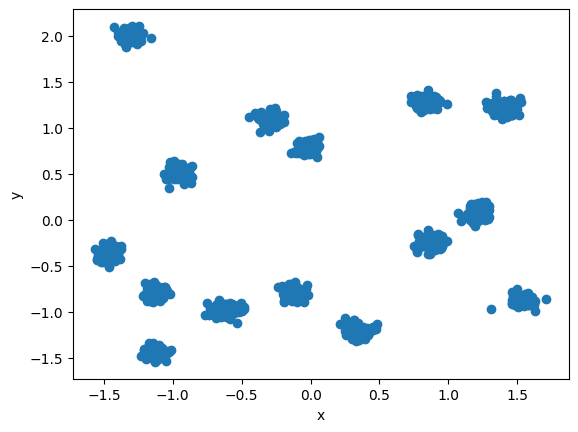

In [43]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

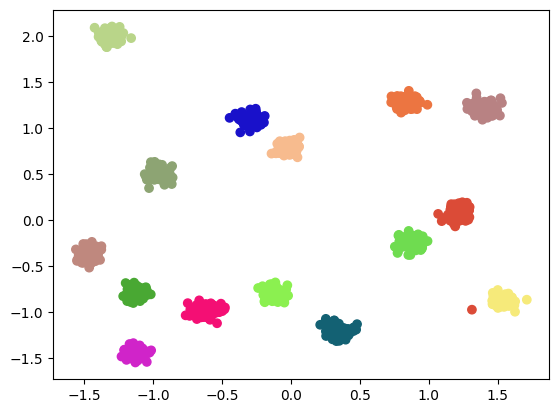

In [45]:
dbscan = DBSCAN(eps=0.1, metric=euclidean)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

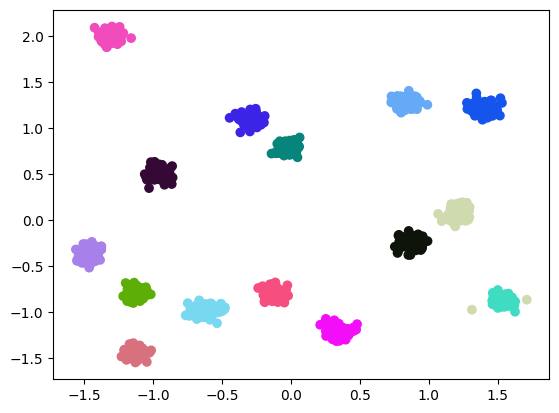

In [46]:
dbscan = DBSCAN(eps=0.1, metric=cityblock)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

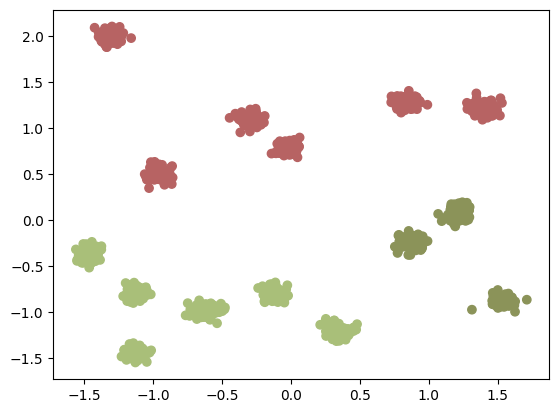

In [47]:
dbscan = DBSCAN(eps=0.1, metric=cosine)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

## Jaccard Distance

In [49]:
df = pd.read_csv(
    "./data/breast-cancer.data",
    header=None,
    names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
    )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Most columns are categorical, so a numeric distance based calculation would not be very useful. Instead we can use the set similarity score, Jaccard distance.

In [52]:
oh_enc = OneHotEncoder()
X = oh_enc.fit_transform(df.drop(columns=['age'])).toarray()

In [54]:
X30to39 = X[df[df.age == '30-39'].index]
X60to69 = X[df[df.age == '60-69'].index]

X30to39.shape, X60to69.shape

((36, 39), (57, 39))

In [56]:
(
    avg_distance(X30to39, X30to39, jaccard_score),
    avg_distance(X60to69, X60to69, jaccard_score),
    avg_distance(X30to39, X60to69, jaccard_score)
)

(0.6435631883548536, 0.6182114564956281, 0.7324778699972173)

## Exercises


In [60]:
sentence1 = 'Hello everyone and welcome to distance metrics'
sentence2 = 'Hello world and welcome to distance metrics'

s1set = set(sentence1.split())
s2set = set(sentence2.split())
len(s1set.intersection(s2set)) / len(s1set.union(s2set))

0.75

In [62]:
p1 = np.array([4, -3, 1])
p2 = np.array([-5, 1, -7])
import scipy.special
euclidean = scipy.spatial.distance.euclidean(p1, p2)
manhattan = scipy.spatial.distance.cityblock(p1, p2)
abs(manhattan - euclidean)

np.float64(8.31142245955048)

In [63]:
p1 = np.array([1, 2, 3]).reshape(1, -1)
p2 = np.array([-2, -4, -6]).reshape(1, -1)
cosine_distances(p1, p2)

array([[2.]])

In [65]:
X1 = np.arange(8).reshape(4, 2)
X2 = np.arange(8)[::-1].reshape(4, 2)
print(f'X1:\n{X1}')
print(f'X2:\n{X2}')

paired_euclidean = paired_euclidean_distances(X1, X2)
paired_manhattan = paired_manhattan_distances(X1, X2)

X1:
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
X2:
[[7 6]
 [5 4]
 [3 2]
 [1 0]]
